In [1]:
!wget https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip

--2020-10-08 05:28:13--  https://www.dropbox.com/s/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip [following]
--2020-10-08 05:28:13--  https://www.dropbox.com/s/raw/0vyzjcqsdl6cqi2/state-farm-distracted-driver-detection.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc80a5450542c0c02a055e97b9b0.dl.dropboxusercontent.com/cd/0/inline/BA0BBx-vMAr6l0jPHALNwZ8hAKEd_i4A0-akkzMhCHLOF-gjQD8JPCvR_hfzBbyztEZL3T7jsSeZMh2sCceevEEEyf9AeyfzWbs1-tDmekyrIw/file# [following]
--2020-10-08 05:28:13--  https://uc80a5450542c0c02a055e97b9b0.dl.dropboxusercontent.com/cd/0/inline/BA0BBx-vMAr6l0jPHALNwZ8hAKEd_i4A0-akkzMhCHLOF

In [2]:
import numpy as np 
import pandas as pd 
import random

!unzip /content/state-farm-distracted-driver-detection.zip


Archive:  /content/state-farm-distracted-driver-detection.zip
  inflating: sample_submission.csv   
  inflating: driver_imgs_list.csv    
  inflating: imgs.zip                


In [3]:
!unzip /content/imgs.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/c7/img_56699.jpg  
  inflating: train/c7/img_56717.jpg  
  inflating: train/c7/img_56724.jpg  
  inflating: train/c7/img_56768.jpg  
  inflating: train/c7/img_56779.jpg  
  inflating: train/c7/img_56849.jpg  
  inflating: train/c7/img_56899.jpg  
  inflating: train/c7/img_56938.jpg  
  inflating: train/c7/img_5706.jpg   
  inflating: train/c7/img_57076.jpg  
  inflating: train/c7/img_57122.jpg  
  inflating: train/c7/img_57137.jpg  
  inflating: train/c7/img_5715.jpg   
  inflating: train/c7/img_57278.jpg  
  inflating: train/c7/img_57321.jpg  
  inflating: train/c7/img_57345.jpg  
  inflating: train/c7/img_57355.jpg  
  inflating: train/c7/img_5741.jpg   
  inflating: train/c7/img_57433.jpg  
  inflating: train/c7/img_5753.jpg   
  inflating: train/c7/img_57559.jpg  
  inflating: train/c7/img_57594.jpg  
  inflating: train/c7/img_5771.jpg   
  inflating: train/c7/img_57712.jpg  
  inflating: train/c7/img_57733.jpg  

In [4]:
# !pip install tensorflow-gpu==2.0.0-alpha0;

In [2]:
directory = '/content/train'
test_directory = '/content/test'
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']





In [3]:
img_size = 240

In [4]:
import cv2
import matplotlib.pyplot as plt

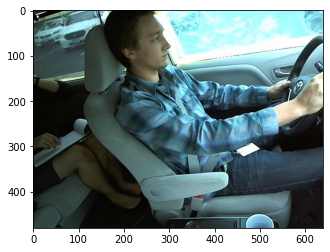

In [5]:
import os
for i in classes:
    path = os.path.join(directory,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(RGB_img)
        plt.show()
        break
    break

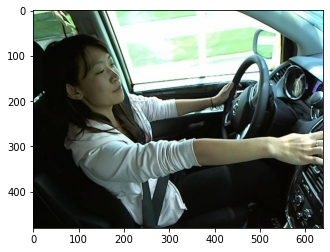

In [6]:
test_array = []
for img in os.listdir(test_directory):
    img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_COLOR)
    RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    test_array = RGB_img
    plt.imshow(RGB_img)
    plt.show()
    break

In [7]:
print(img_array.shape)

(480, 640, 3)


(240, 240, 3)


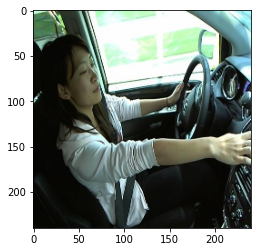

In [8]:
new_img = cv2.resize(test_array,(img_size,img_size))
print(new_img.shape)
plt.imshow(new_img)
plt.show()

In [9]:
training_data = []
i = 0
def create_training_data():
    for category in classes:
        path = os.path.join(directory,category)
        class_num = classes.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
            RGB_img = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            new_img = cv2.resize(RGB_img,(img_size,img_size))
            training_data.append([new_img,class_num])

In [10]:

create_training_data()

In [11]:
print(len(training_data))

22424


In [12]:
print(img_array.shape)

(480, 640, 3)


(240, 240, 3)


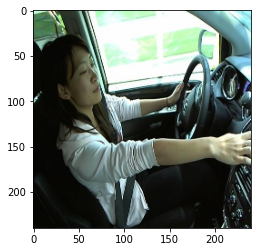

In [13]:
new_img = cv2.resize(test_array,(img_size,img_size))
print(new_img.shape)
plt.imshow(new_img)
plt.show()

In [14]:
import random
random.shuffle(training_data)
x = []
y = []

In [15]:


for features, label in training_data:
    x.append(features)
    y.append(label)



In [16]:
x = x[:2242]
y = y[:2242]

In [17]:
len(x),len(y)

(2242, 2242)

In [18]:
x[0].shape

(240, 240, 3)

In [19]:
len(x)

2242

In [20]:
import numpy as np 
import pandas as pd 
x = np.array(x).reshape(-1,img_size,img_size,3)
x[0].shape

(240, 240, 3)

In [21]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=96)

In [22]:

del x,y

In [23]:
import gc
gc.collect()

0

In [24]:
# %tensorflow_version 2.x
# !pip uninstall -y tensorflow
# !pip install tensorflow-gpu==1.14.0

In [25]:
!pip install keras-utils
import keras
import keras_utils

In [26]:
from keras.utils import to_categorical

In [27]:
Y_train = to_categorical(y_train,num_classes=10)
Y_test = to_categorical(y_test,num_classes=10)

In [28]:
from tensorflow.keras import datasets, layers, models, callbacks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, Activation, BatchNormalization

In [29]:
model = models.Sequential()
## CNN 1
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(240,240,3)))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
## CNN 2
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))
## CNN 3
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(BatchNormalization(axis = 3))
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))
## Dense & Output
model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 238, 238, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 238, 238, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 238, 238, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 238, 238, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 119, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 119, 119, 64)      1

In [31]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
callback = [callbacks.EarlyStopping(monitor='val_accuracy',patience=5)]
batch_size = 40
n_epochs = 10

In [32]:
results = model.fit(x_train,Y_train,
                    batch_size=batch_size,epochs=n_epochs,
                    verbose=1,
                    validation_data=(x_test,Y_test),
                    callbacks=callback)

Epoch 1/10
40/40 [==============================] - 745s 19s/step - loss: 2.6906 - accuracy: 0.2110 - val_loss: 2.4035 - val_accuracy: 0.2125
Epoch 2/10
40/40 [==============================] - 739s 18s/step - loss: 1.5242 - accuracy: 0.4876 - val_loss: 1.4471 - val_accuracy: 0.5423
Epoch 3/10
40/40 [==============================] - 739s 18s/step - loss: 0.8928 - accuracy: 0.7196 - val_loss: 0.9577 - val_accuracy: 0.6508
Epoch 4/10
40/40 [==============================] - 731s 18s/step - loss: 0.6085 - accuracy: 0.7941 - val_loss: 0.6960 - val_accuracy: 0.7890
Epoch 5/10
40/40 [==============================] - 730s 18s/step - loss: 0.3830 - accuracy: 0.8802 - val_loss: 0.3901 - val_accuracy: 0.8811
Epoch 6/10
40/40 [==============================] - 729s 18s/step - loss: 0.2895 - accuracy: 0.9095 - val_loss: 0.2633 - val_accuracy: 0.9168
Epoch 7/10
40/40 [==============================] - 731s 18s/step - loss: 0.1934 - accuracy: 0.9426 - val_loss: 0.2249 - val_accuracy: 0.9272
Epoch 

In [32]:
# Plot training & validation accuracy values
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [33]:
pred= model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [34]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94        66
           1       1.00      0.98      0.99        83
           2       0.99      0.94      0.96        70
           3       0.94      0.97      0.96        79
           4       0.90      0.92      0.91        59
           5       0.95      0.97      0.96        58
           6       0.96      0.93      0.94        81
           7       1.00      0.92      0.96        60
           8       0.74      0.94      0.83        51
           9       1.00      0.77      0.87        66

    accuracy                           0.93       673
   macro avg       0.94      0.93      0.93       673
weighted avg       0.94      0.93      0.94       673



In [36]:
model.save_weights('./driverdistraction_lr_weights.h5', overwrite=True)

In [37]:
model.save('./driverdistraction.h5')